In [1]:
import pandas as pd
import dabl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#importing all required libraries

In [2]:
defr = pd.read_csv('goal15.forest_shares.csv')
#reading the dataset

In [3]:
#observing dataset
defr.head(n=10)

,iso3c,forests_2000,forests_2020,trend
0,AFG,1.9,1.9,0.0
1,ALB,28.1,28.8,2.5
2,DZA,0.7,0.8,14.3
3,ASM,88.7,85.7,-3.4
4,AND,34.0,34.0,0.0
5,AGO,62.3,53.4,-14.3
6,AIA,61.1,61.1,0.0
7,ATG,21.5,18.5,-14.0
8,ARG,12.2,10.4,-14.8
9,ARM,11.7,11.5,-1.7


In [4]:
sum_2020 = defr.forests_2020.sum()

In [5]:
defr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   iso3c         237 non-null    object 
 1   forests_2000  237 non-null    float64
 2   forests_2020  237 non-null    float64
 3   trend         227 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.5+ KB


In [6]:
defr['country_code'] = defr.iso3c
defr.drop('iso3c',axis = 1,inplace = True)
defr.dropna(axis=0,inplace=True)
defr.head(n=10)

,forests_2000,forests_2020,trend,country_code
0,1.9,1.9,0.0,AFG
1,28.1,28.8,2.5,ALB
2,0.7,0.8,14.3,DZA
3,88.7,85.7,-3.4,ASM
4,34.0,34.0,0.0,AND
5,62.3,53.4,-14.3,AGO
6,61.1,61.1,0.0,AIA
7,21.5,18.5,-14.0,ATG
8,12.2,10.4,-14.8,ARG
9,11.7,11.5,-1.7,ARM


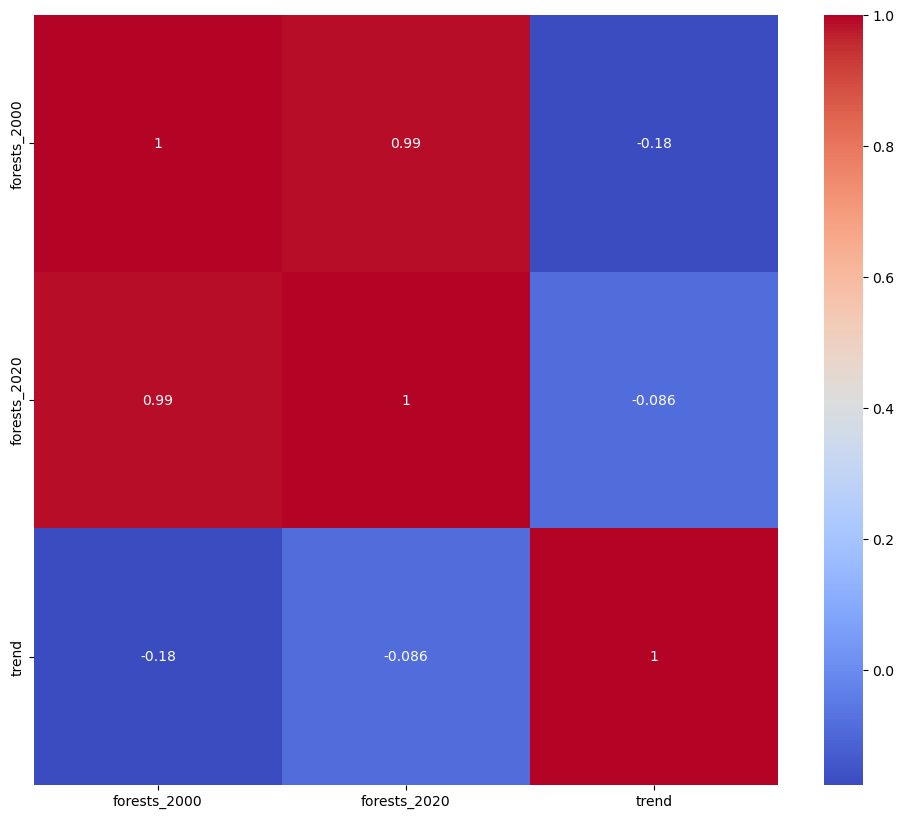

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(defr.drop('country_code',axis=1).corr(),annot=True,cmap='coolwarm')
#plt.savefig('deforestation_correlation_matrix.png')

<Figure size 1200x1000 with 0 Axes>

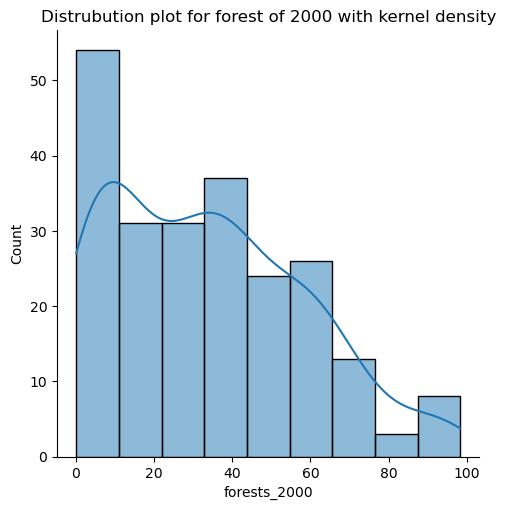

In [18]:
plt.figure(figsize=(12,10))
sns.displot(defr['forests_2000'],kde=True)
plt.title('Distrubution plot for forest of 2000 with kernel density')
#plt.savefig('forests_2000_distplot')

<Figure size 1200x1000 with 0 Axes>

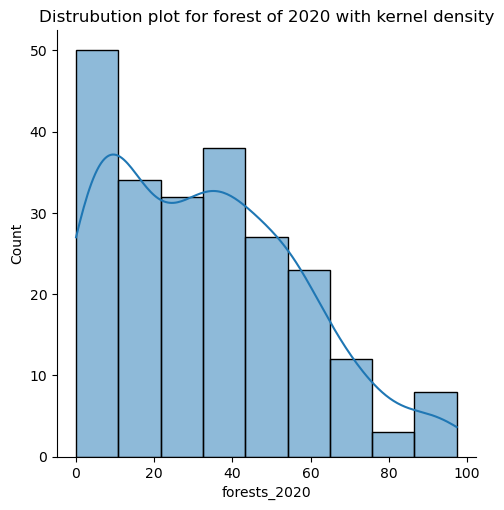

In [19]:
plt.figure(figsize=(12,10))
sns.displot(defr['forests_2020'],kde=True)
plt.title('Distrubution plot for forest of 2020 with kernel density')
#plt.savefig('forests_2020_distplot')

<Figure size 1200x1000 with 0 Axes>

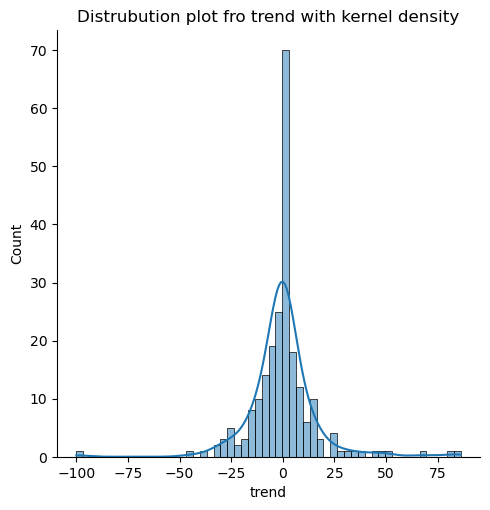

In [20]:
plt.figure(figsize=(12,10))
sns.displot(defr['trend'],kde=True)
plt.title('Distrubution plot fro trend with kernel density')
#plt.savefig('trend_distplot')

<Figure size 500x500 with 0 Axes>

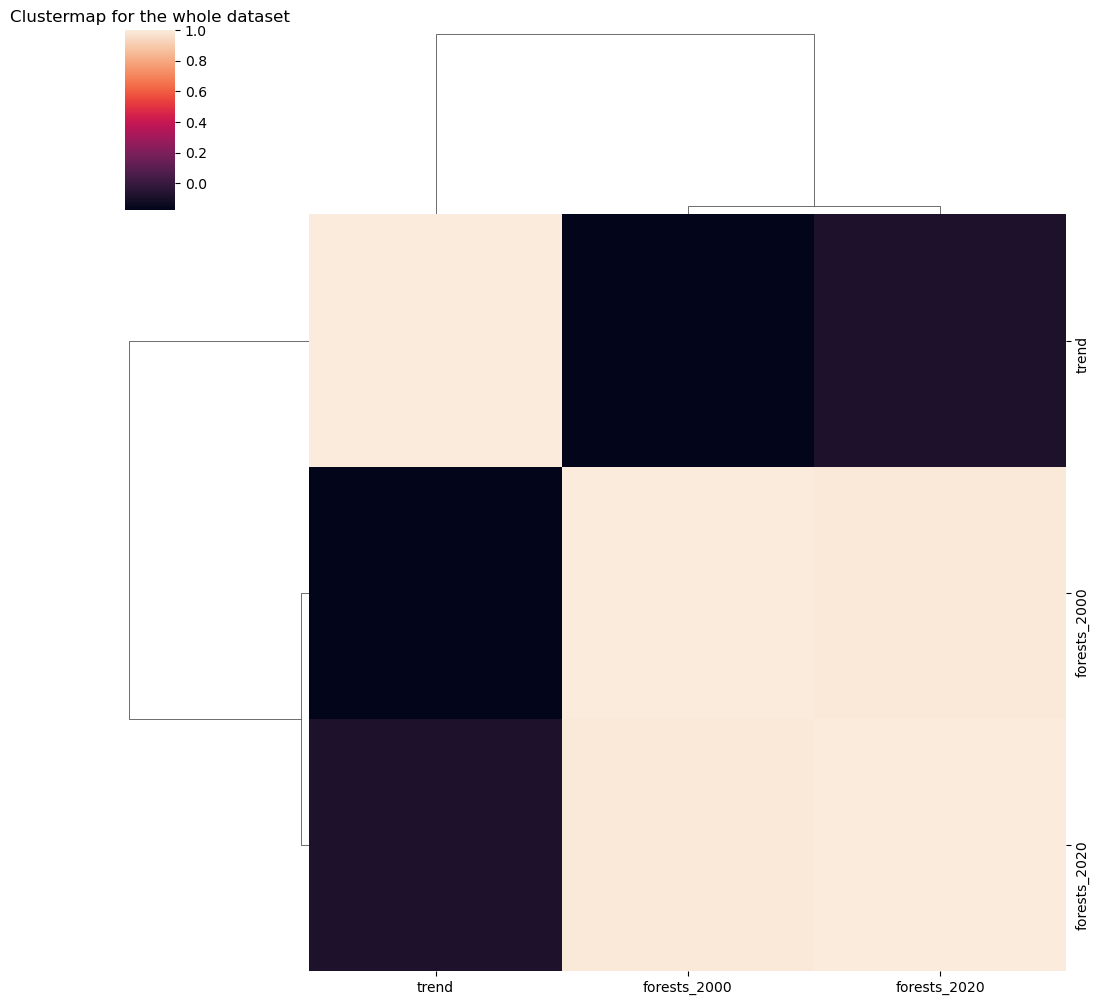

In [21]:
plt.figure(figsize=(5,5))
sns.clustermap(defr.drop('country_code',axis=1).corr())
plt.title('Clustermap for the whole dataset')
#plt.savefig('cluster_map')

In [22]:
#from the correlations between the 2020 and 2000 and from the clustermap we can see that the 2020 and 2000 haven't changed that much
#We can also see that the trend has more countries at 0 and some even in the negative side, so there is not much change there either 

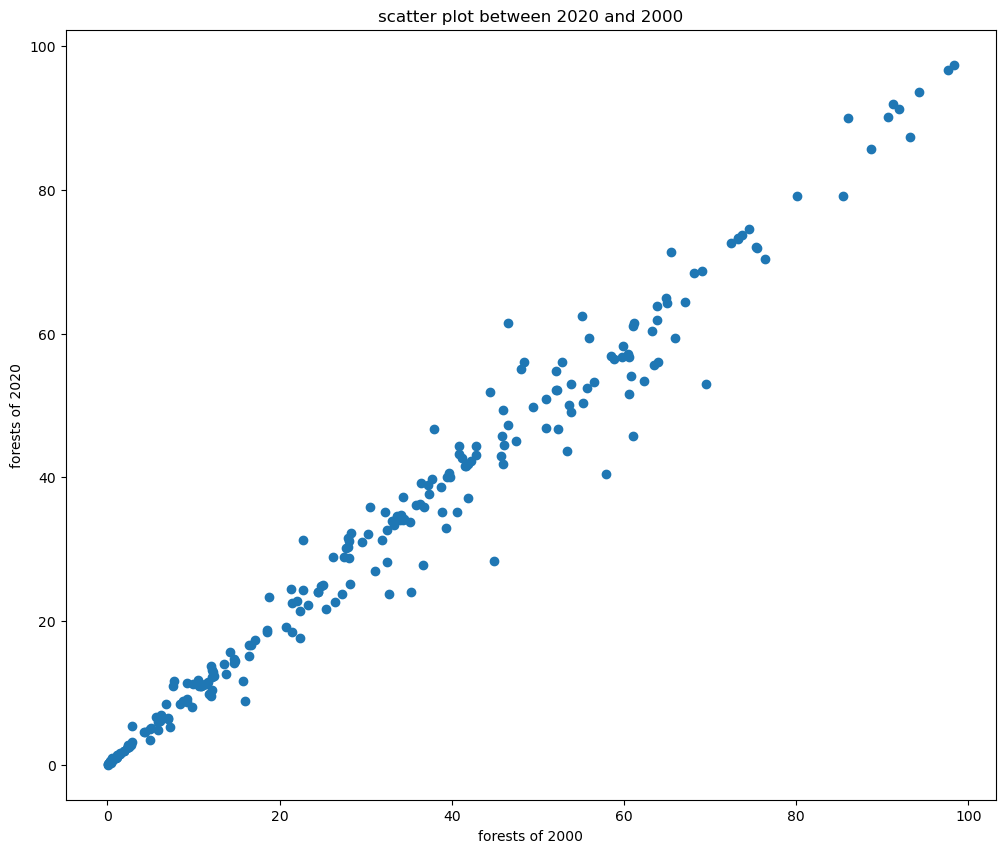

In [23]:
plt.figure(figsize=(12,10))
plt.scatter(defr['forests_2000'],defr['forests_2020'])
plt.title('scatter plot of 2020 against 2000')
plt.xlabel('forests of 2000')
plt.ylabel('forests of 2020')
#plt.savefig('plot of 2000 against 2020')

In [24]:
#just for fun lets train a model to find the 2020 forest when given the 2000 forest and the trend
X = defr[['forests_2000','trend']]
y = defr['forests_2020']
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=0)

In [26]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
sclr = MinMaxScaler()
X_train_scaled = sclr.fit_transform(X_train)
X_test_scaled = sclr.transform(X_test)

In [27]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train_scaled,y_train)

In [28]:
print('training score ',linreg.score(X_train_scaled,y_train))
print('testing score ',linreg.score(X_test_scaled,y_test))

training score  0.9836727505063394
testing score  0.9854231877118674


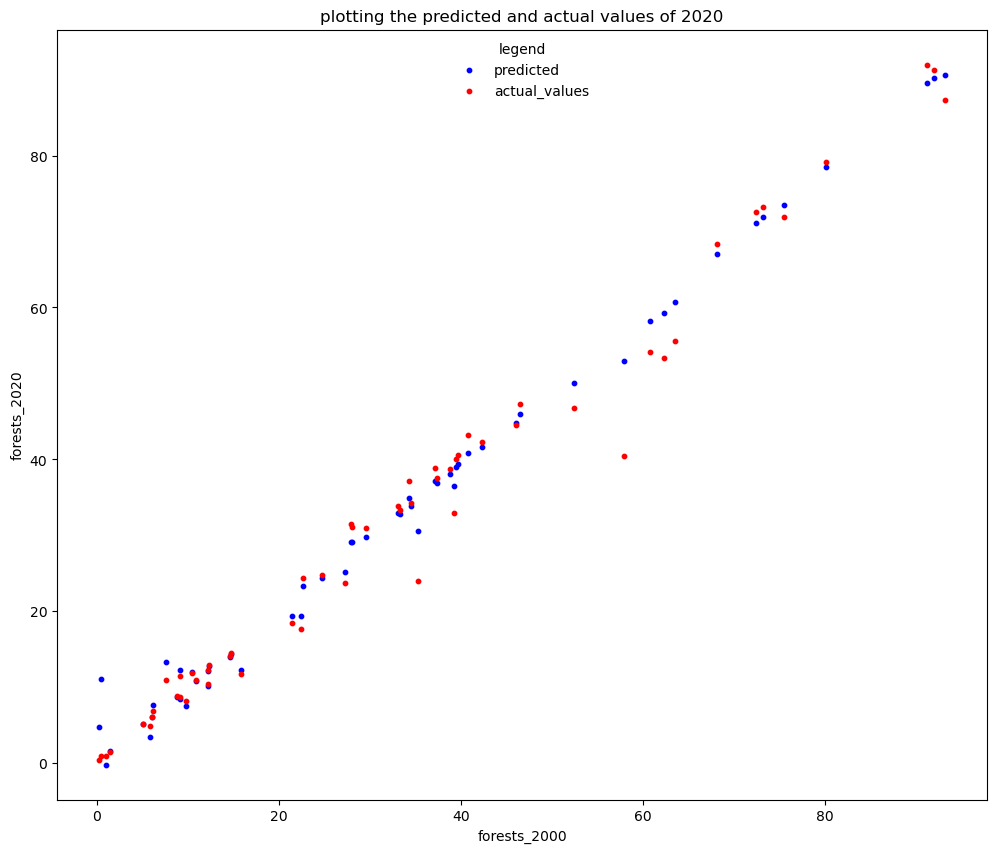

In [49]:
plt.figure(figsize=(12,10))
plt.scatter(X_test['forests_2000'],linreg.predict(X_test_scaled),s=10,color='blue',label = 'predicted')
plt.scatter(X_test['forests_2000'],y_test,s=10,color='red',label='actual_values')
plt.xlabel('forests_2000')
plt.ylabel('forests_2020')
plt.title('plotting the predicted and actual values of 2020')
plt.legend(loc='upper center',frameon=False, title='legend')
plt.savefig('predicted_and_actual.png')